In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [31]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 2.29311301,  1.70968397,  1.29242667, -1.40270991, -1.29363731,
        -1.9563419 , -1.74680746, -1.04840543, -0.49889819,  1.0239416 ],
       [-0.61897635, -0.65735017, -0.80771919,  0.69894474,  0.45465409,
         0.72178873, -0.52908219,  0.29771481,  1.46762785, -1.84064972]])

In [32]:
test_Features[:2]

array([[ 0.07279211,  0.6026104 ,  0.6616423 , -1.00885479, -0.96334416,
        -0.12018435, -1.09602323,  1.40605112,  0.33606541,  0.99772716],
       [ 0.15265522,  0.15653551,  1.69912494, -1.13740473, -1.09727125,
         0.48249614,  0.77306864,  0.89930723, -0.99374677,  0.36174278]])

In [33]:
train_Label[:4]

array([0, 1, 1, 1])

In [34]:
train_Features.shape

(15216, 10)

In [35]:
test_Label[:4]

array([0, 1, 1, 1])

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [37]:
model = Sequential()

In [38]:
model.add(Dense(units=20*10,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [39]:
model.add(Dense(units=20*9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=20*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [41]:
model.add(Dense(units=20*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [42]:
model.add(Dense(units=20*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [43]:
model.add(Dense(units=20*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [44]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [45]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [46]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [47]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [48]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_13 (Dense)             (None, 180)               36180     
_________________________________________________________________
dense_14 (Dense)             (None, 160)               28960     
_________________________________________________________________
dense_15 (Dense)             (None, 140)               22540     
_________________________________________________________________
dense_16 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_18 (Dense)             (None, 80)                8080      
__________

In [50]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [51]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 3s - loss: 0.6883 - acc: 0.6387 - val_loss: 0.6757 - val_acc: 0.6498
Epoch 2/30
 - 1s - loss: 0.5547 - acc: 0.6493 - val_loss: 0.4932 - val_acc: 0.6498
Epoch 3/30
 - 1s - loss: 0.4698 - acc: 0.7136 - val_loss: 0.4322 - val_acc: 0.8456
Epoch 4/30
 - 1s - loss: 0.3709 - acc: 0.8497 - val_loss: 0.3570 - val_acc: 0.8574
Epoch 5/30
 - 1s - loss: 0.3398 - acc: 0.8637 - val_loss: 0.3416 - val_acc: 0.8614
Epoch 6/30
 - 1s - loss: 0.3260 - acc: 0.8680 - val_loss: 0.3373 - val_acc: 0.8627
Epoch 7/30
 - 1s - loss: 0.3246 - acc: 0.8688 - val_loss: 0.3320 - val_acc: 0.8581
Epoch 8/30
 - 1s - loss: 0.3155 - acc: 0.8713 - val_loss: 0.3345 - val_acc: 0.8673
Epoch 9/30
 - 1s - loss: 0.3140 - acc: 0.8716 - val_loss: 0.3234 - val_acc: 0.8673
Epoch 10/30
 - 1s - loss: 0.3068 - acc: 0.8754 - val_loss: 0.3276 - val_acc: 0.8686
Epoch 11/30
 - 1s - loss: 0.3064 - acc: 0.8757 - val_loss: 0.3240 - val_acc: 0.8686
Epoch 12/30
 - 1s - loss: 0.3021 - a

In [52]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

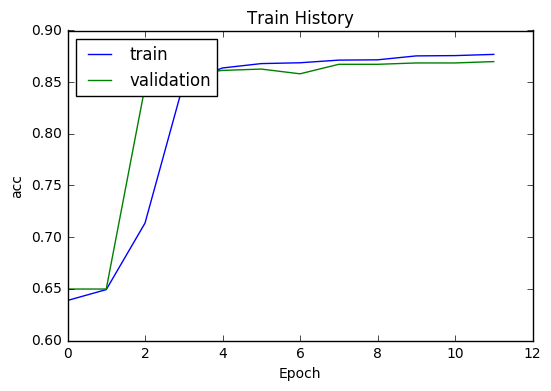

In [53]:
show_train_history(train_history,'acc','val_acc')

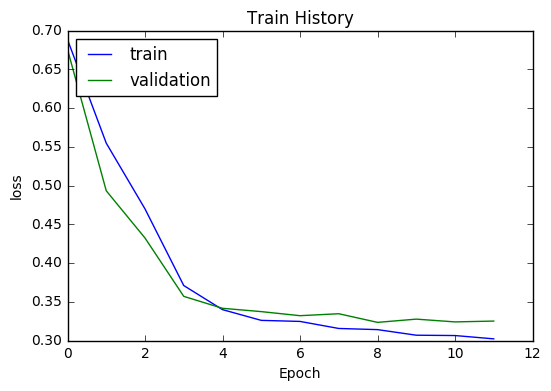

In [54]:
show_train_history(train_history,'loss','val_loss')

In [55]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 51us/step


In [56]:
scores[1]

0.8654048372016971